<a href="https://colab.research.google.com/github/fathimayusuff/COMP5118/blob/master/Template_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=87757eddb4cf2df514da5ff5cb809d98891b60edda8c27b04150b5e8ef0c8b4f
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [0]:
import pandas as pd
import wikipedia as wp

In [33]:
from google.colab import files
uploaded = files.upload()

Saving Wikipedia_Tables - Sheet1.csv to Wikipedia_Tables - Sheet1 (3).csv


In [0]:
df_wiki = pd.read_csv('Wikipedia_Tables - Sheet1 (3).csv')

In [35]:
df_wiki.head(5)

,S.No,Name of Table,Member,Measure,superlatives,Root,Unnamed: 6
0,1,List of largest California cities by land area,City,Land Area,largest,City,NaN
1,2,List of the 100 largest cities and towns in Ca...,Municipality,Area,largest,Municipality,NaN
2,3,List of city squares by size,City Square,Area,largest,City Square,NaN
3,4,List of countries and dependencies by area,Sovereign State/ dependency,Total in km,largest,country,NaN
4,5,List of countries and territories by border/ar...,Country or Teritory,Border/ area ratio,largest,country,NaN


In [0]:
df=df_wiki

In [37]:
df.superlatives.unique()

array(['largest', 'most streamed', 'most liked', 'most retweeted',
       'most popular', 'most followed', 'most disliked', 'most viewed',
       'most subscribed', 'most expensive', 'oldest', 'extreme',
       'biggest', 'most produced', 'heaviest', 'longest', 'fastest',
       'tallest', 'last', 'smallest', 'wealthiest', 'populous',
       'greatest', 'subdivisions', 'highest', 'long', 'shortest',
       'youngest'], dtype=object)

In [0]:
from jinja2 import Template

In [0]:
rank='{rank}'
entity='{entity}'
superlative=df.superlatives
entity_class=df.Member


In [0]:
temp1=[]

In [55]:
for index, row in df.iterrows(): 
    #rank=row["Rank"]
    #entity=row['Company']
    superlative=row['superlatives']
    entity_class=row['Member']
    #tm=Template("{{entity}} is the {{rank}} {{superlative}} {{entity_class}}")
    tm=Template("{{entity}} is the {{rank}} {{superlative}} {{entity_class}}")
    msg = tm.render(entity=entity,rank=rank, superlative=superlative, entity_class=entity_class)
    temp1.append(msg)
    print(msg)

{entity} is the {rank} largest City
{entity} is the {rank} largest Municipality
{entity} is the {rank} largest City Square
{entity} is the {rank} largest Sovereign State/ dependency
{entity} is the {rank} largest Country or Teritory
{entity} is the {rank} largest Country/ Region
{entity} is the {rank} largest Empire
{entity} is the {rank} largest Empire
{entity} is the {rank} largest State
{entity} is the {rank} largest City
{entity} is the {rank} largest CIty
{entity} is the {rank} largest Country
{entity} is the {rank} largest Country
{entity} is the {rank} largest State
{entity} is the {rank} largest Island
{entity} is the {rank} largest Company
{entity} is the {rank} most streamed Song
{entity} is the {rank} most liked Tweet
{entity} is the {rank} most retweeted Tweet
{entity} is the {rank} most popular Site
{entity} is the {rank} most liked Post Description
{entity} is the {rank} most followed Account name
{entity} is the {rank} most liked Video name
{entity} is the {rank} most di

In [0]:
temp1_pd = pd.DataFrame(temp1,columns=['Template11'])
temp1_pd.to_csv('template_full.csv',header=0,index=False)

In [0]:
df_ = temp1_pd

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_['Template11'])
labels = df.superlatives
features.shape

(107, 18)

In [59]:
df.superlatives.count()

107

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_['Template11'], df['superlatives'], random_state = 0, test_size=0.5)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)


In [72]:
print(clf.predict(count_vect.transform(["{entity} is the {rank} fastest Computer"])))

['largest']


In [73]:
print(clf.predict(count_vect.transform(X_test)))
prediction=clf.predict(count_vect.transform(X_test))

['largest' 'largest' 'largest' 'largest' 'largest' 'largest' 'largest'
 'largest' 'largest' 'largest' 'largest' 'largest' 'largest' 'largest'
 'largest' 'largest' 'largest' 'largest' 'largest' 'largest' 'largest'
 'largest' 'largest' 'largest' 'largest' 'largest' 'largest' 'largest'
 'largest' 'largest' 'largest' 'largest' 'largest' 'largest' 'largest'
 'largest' 'largest' 'largest' 'largest' 'largest' 'largest' 'largest'
 'largest' 'largest' 'largest' 'largest' 'largest' 'largest' 'largest'
 'largest' 'largest' 'largest' 'largest' 'largest']


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [75]:
scores=cross_val_score(clf, X_test, y_test, cv=3)
y_pred = clf.predict(count_vect.transform(X_test))
nb_acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",nb_acc)

Accuracy: 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: '{entity} is the {rank} youngest Age'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: '{entity} is the {rank} largest Province'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on th

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

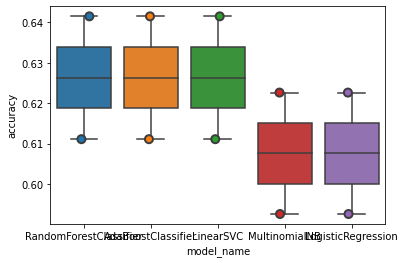

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [79]:
cv_df.groupby('model_name').accuracy.mean()

model_name
AdaBoostClassifier        0.626310
LinearSVC                 0.626310
LogisticRegression        0.607617
MultinomialNB             0.607617
RandomForestClassifier    0.626310
Name: accuracy, dtype: float64